1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

--2022-12-01 21:59:53--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2022-12-01 21:59:54--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6aa10a452625fa90dfa6231748.dl.dropboxusercontent.com/cd/0/inline/Bx3Vff7xnKgAYgFM-G9MRx5xr83bGlRKqhLpN88w-qwx2VkFfIIcEWGvAw7cK3FQeWCH60oE0lJ3nlai443Ca2QFWcDQv1i_3zgf5pQGF3nRiVHcDMmDymvO6rkrxJfszC7xjKE7xx8fltxN6BqWDlkU9vOfwzRwas2Iy7vmqylFxw/file# [following]
--2022-12-01 21:59:54--  https://uc6aa10a452625fa90dfa6231748.dl.dropboxusercontent.com/cd/0/inline/Bx3Vff7xnKgAYgFM-G9MRx5xr83bGlRKqhLpN88w-qwx2VkFfIIcEWGvAw7cK3FQeWCH60o

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

n=20000

df = pd.read_csv("./data/data_000637.txt", sep=",", nrows=n)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29
19996,1,0,63,3869200366,2517,6
19997,1,0,32,3869200366,2519,5
19998,1,0,17,3869200366,2522,21


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [3]:
bx_max_orbit = df.groupby(["ORBIT_CNT"])["BX_COUNTER"].max()
bx_max_orbit

bx_max = df["BX_COUNTER"].max()
bx_max

3563

3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [4]:
df['ABS_TIME']  = df.apply(lambda row: (row.ORBIT_CNT)*bx_max_orbit.max()*25 + (row.BX_COUNTER)*25 + (row.TDC_MEAS)*25/30, axis=1)
#df['ABS_TIME'] = df['ABS_TIME'].astype('datetime64[ns]')
df['ABS_TIME'] = pd.to_datetime(df['ABS_TIME'])
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,1970-01-04 23:44:09.004934896
1,1,0,124,3869200167,2374,27,1970-01-04 23:44:09.004934897
2,1,0,63,3869200167,2553,28,1970-01-04 23:44:09.004939373
3,1,0,64,3869200167,2558,19,1970-01-04 23:44:09.004939490
4,1,0,64,3869200167,2760,25,1970-01-04 23:44:09.004944545
...,...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29,1970-01-04 23:44:09.022664299
19996,1,0,63,3869200366,2517,6,1970-01-04 23:44:09.022664380
19997,1,0,32,3869200366,2519,5,1970-01-04 23:44:09.022664429
19998,1,0,17,3869200366,2522,21,1970-01-04 23:44:09.022664517


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [5]:
df2 = pd.read_csv("./data/data_000637.txt", sep=",")

abc=df2["BX_COUNTER"].max()
df2['ABS_TIME'] = df2.apply(lambda row: (row.ORBIT_CNT)*abc*25 + (row.BX_COUNTER)*25 + (row.TDC_MEAS)*25/30, axis=1)
df2['ABS_TIME'] = pd.to_timedelta(df2['ABS_TIME'])
df2.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,3 days 23:44:09.004934896
1,1,0,124,3869200167,2374,27,3 days 23:44:09.004934897
2,1,0,63,3869200167,2553,28,3 days 23:44:09.004939373
3,1,0,64,3869200167,2558,19,3 days 23:44:09.004939490
4,1,0,64,3869200167,2760,25,3 days 23:44:09.004944545
5,1,0,63,3869200167,2762,4,3 days 23:44:09.004944578
6,1,0,61,3869200167,2772,14,3 days 23:44:09.004944836
7,1,0,139,3869200167,2776,0,3 days 23:44:09.004944925
8,1,0,62,3869200167,2774,21,3 days 23:44:09.004944892
9,1,0,60,3869200167,2788,7,3 days 23:44:09.004945230


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [6]:
count_tdc = df.groupby(["TDC_CHANNEL"]).count().sort_values(by="HEAD", ascending=False).iloc[0:3]
count_tdc

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
TDC_CHANNEL,,,,,,
139,1693,1693,1693,1693,1693,1693
64,996,996,996,996,996,996
63,969,969,969,969,969,969


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [7]:
print("The non empty orbits are:",len(df2.groupby("ORBIT_CNT").count()))

The non empty orbits are: 11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [8]:
orbit_tdc_139 = df2[df2["TDC_CHANNEL"]==139].groupby(["ORBIT_CNT"]).count()
len(orbit_tdc_139)

10976

8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [9]:
fpga_tdc_count = df.groupby(["FPGA", "TDC_CHANNEL"])["TDC_CHANNEL"].count().sort_values(ascending=False)
fpga_tdc_count

fpga_0 = pd.Series(data=df2[df2["FPGA"]==0]["TDC_CHANNEL"].value_counts())
fpga_1 = pd.Series(data=df2[df2["FPGA"]==1]["TDC_CHANNEL"].value_counts())
fpga_1

2      32669
139    32442
1      28438
4      26403
3      21970
       ...  
9         80
130       38
138       36
137       36
129       35
Name: TDC_CHANNEL, Length: 132, dtype: int64

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0, 0.5, 'Count')

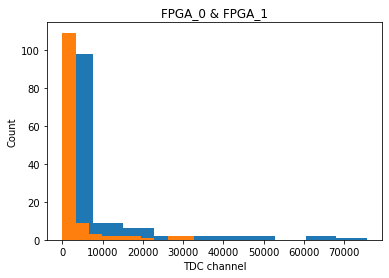

In [10]:
fig, (ax1) = plt.subplots(1)

ax1.hist(fpga_0)
ax1.hist(fpga_1)
ax1.set_title('FPGA_0 & FPGA_1')
ax1.set_xlabel('TDC channel')
ax1.set_ylabel('Count')